[Dopravci na Vánoce napálili ceny. Vlak do Drážďan stojí tisíce](https://www.novinky.cz/clanek/ekonomika-dopravci-na-vanoce-napalili-ceny-vlak-do-drazdan-stoji-tisice-40501317), píší na Novinkách. Ono to ale je, jako obvykle, složitější.

In [9]:
import pandas as pd

In [11]:
df = pd.read_parquet('data/jizdenky.parquet')

In [13]:
df = df[df['kam'].str.contains('Dresd',na=False)]

In [17]:
df_posledni = df.drop_duplicates(subset=['odjezd'], keep='last')

In [29]:
df_posledni.sample()

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,...,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium
1003331,2024-12-01 06:50:28,ČD,Ústí n.L.hl.n.,Dresden Hbf,2025-01-18 11:45:00,48 days 04:54:32,48,1156.908889,361.0,vlak,...,None,so,0,[EC 174 Berliner],True,None,NaN,NaN,NaN,NaN


## Teze: „Jízdné kolem svátků je totiž až více než dvojnásobně dražší než v jiné termíny.“

<Axes: xlabel='odjezd'>

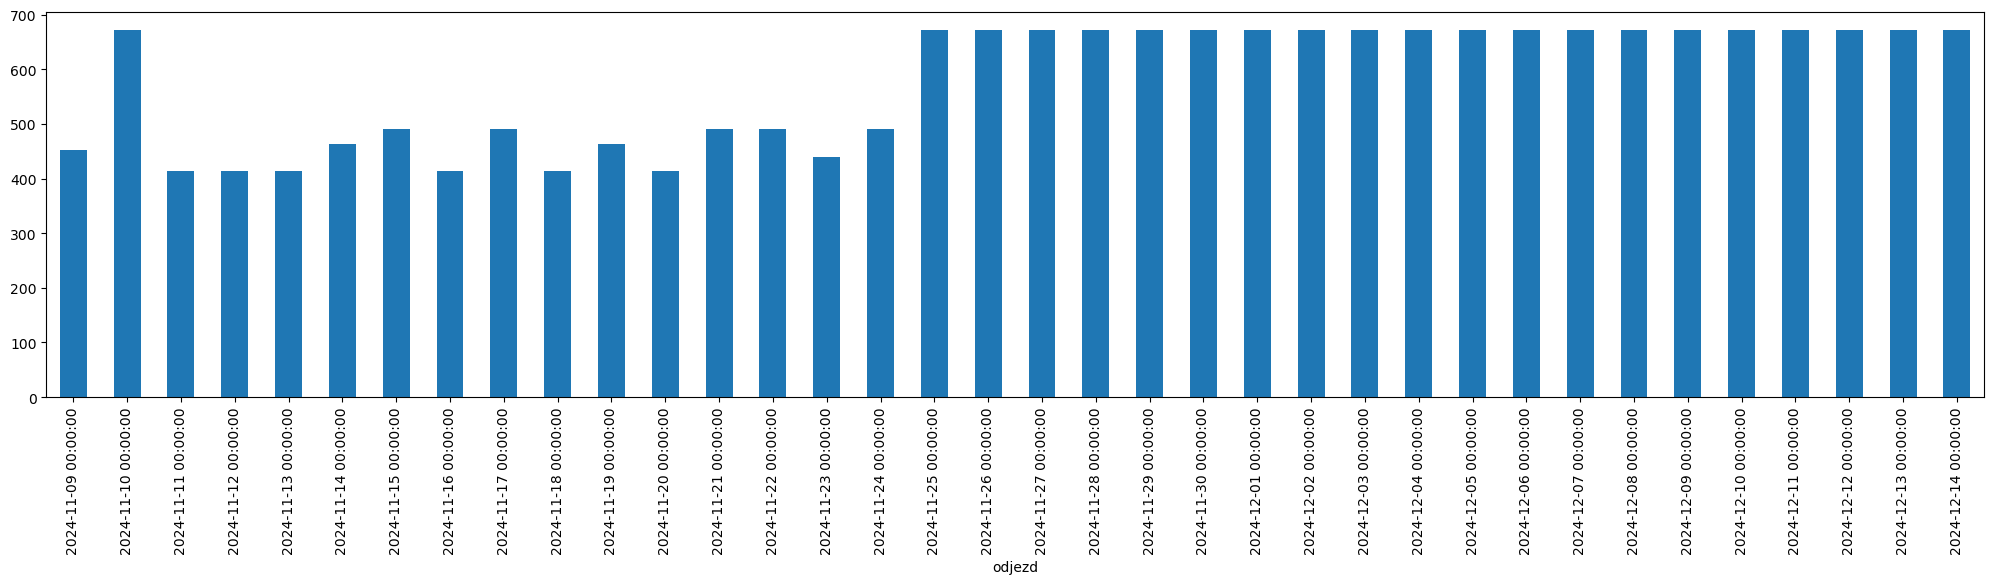

In [45]:
df_posledni[df_posledni['odjezd'] <= '2024-12-15'].groupby(pd.Grouper(key='odjezd', freq='D'))['cena'].median().plot.bar(figsize=(25,5))

<Axes: xlabel='odjezd'>

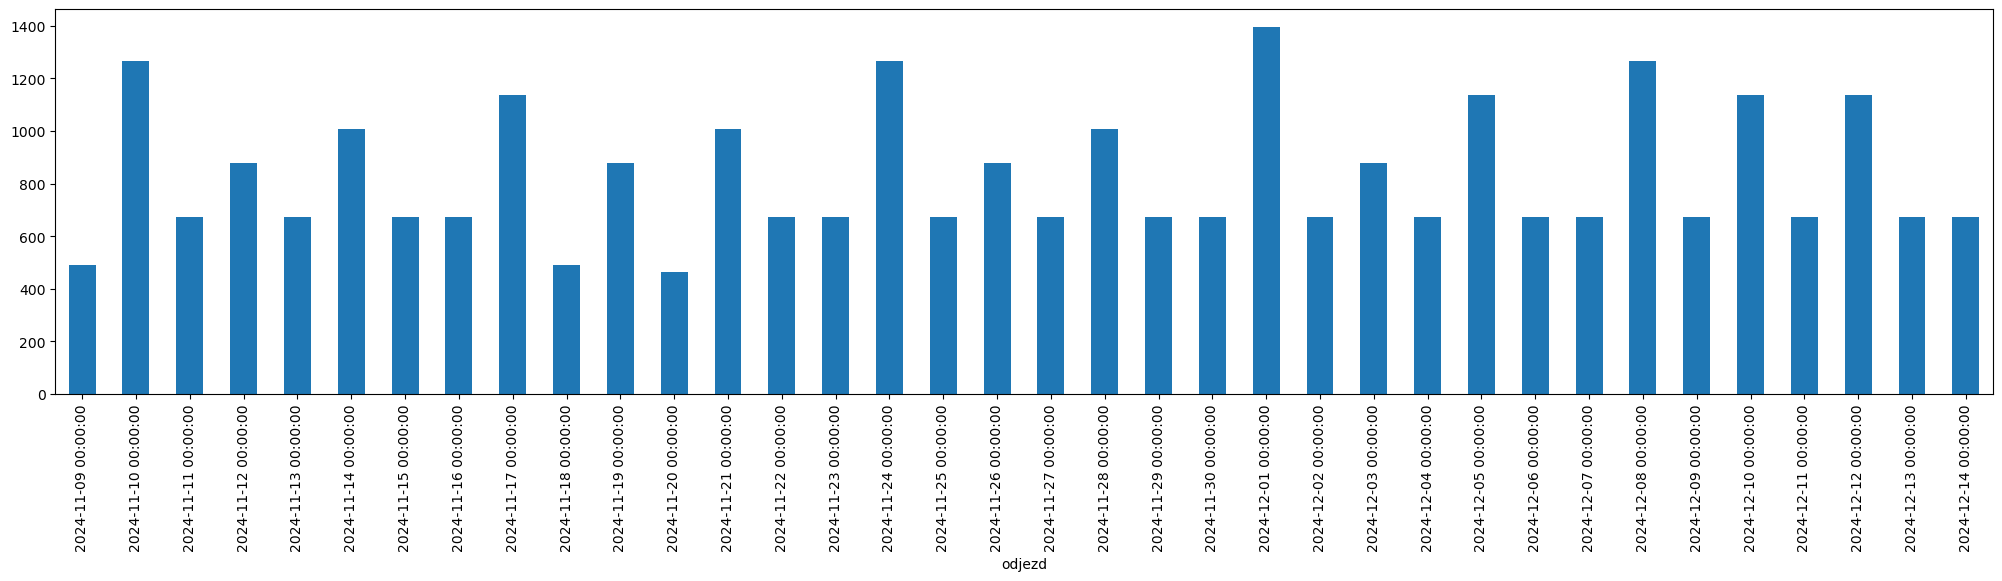

In [50]:
df_posledni[df_posledni['odjezd'] <= '2024-12-15'].groupby(pd.Grouper(key='odjezd', freq='D'))['cena'].max().plot.bar(figsize=(25,5))

<Axes: xlabel='odjezd'>

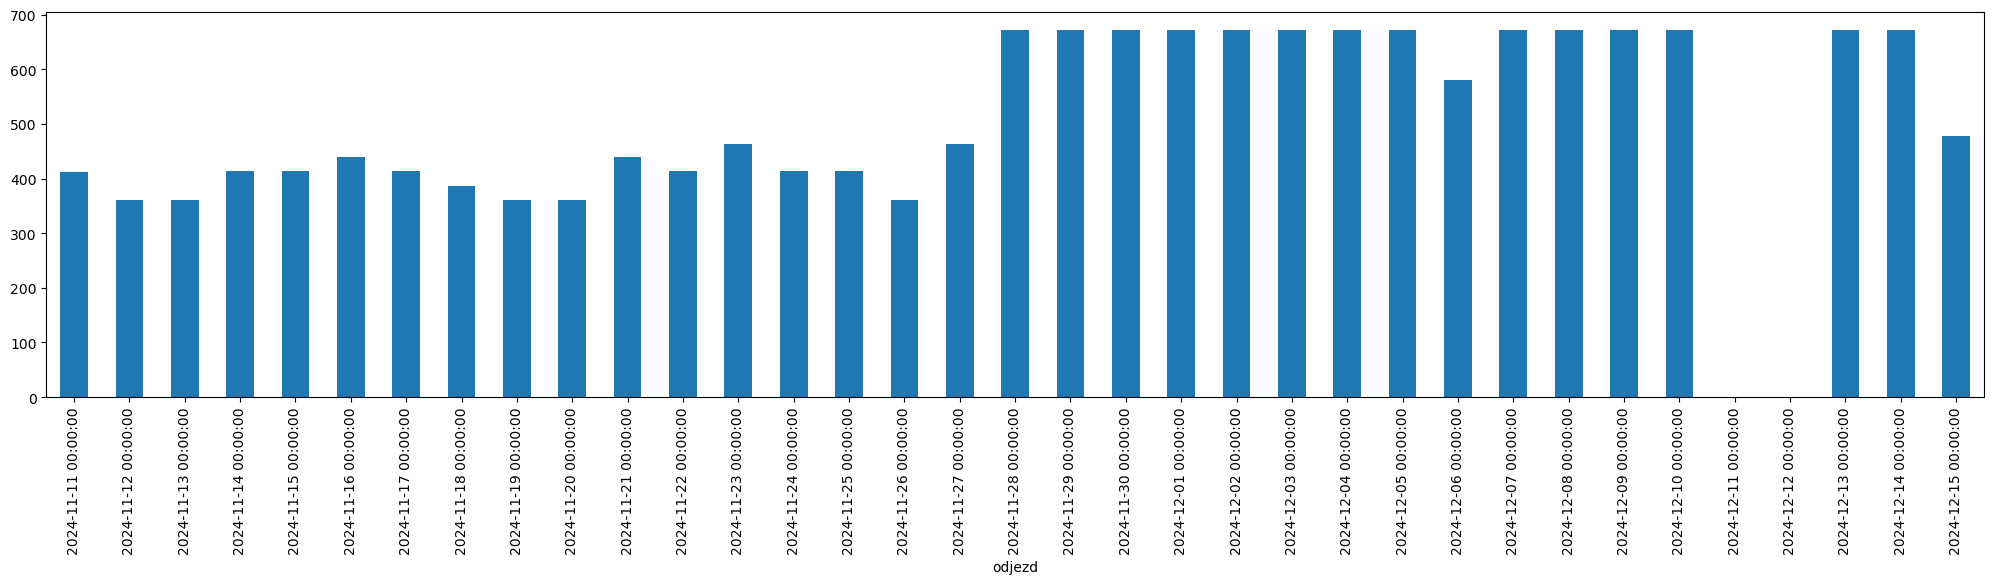

In [56]:
df[df['predstih_d'].isin([2,3])].groupby(pd.Grouper(key='odjezd', freq='D'))['cena'].median().plot.bar(figsize=(25,5))

In [58]:
df_posledni.groupby('odjezd')['cena'].min().nlargest(30)

odjezd
2024-12-01 19:21:00    1393.0
2024-12-22 19:16:00    1393.0
2024-12-29 19:16:00    1393.0
2025-01-02 19:16:00    1393.0
2025-01-05 19:16:00    1393.0
2024-11-10 19:21:00    1264.0
2024-11-24 19:21:00    1264.0
2024-12-08 19:21:00    1264.0
2024-12-15 19:16:00    1264.0
2024-12-19 19:16:00    1264.0
2024-12-26 19:16:00    1264.0
2025-01-19 19:16:00    1264.0
2025-02-09 19:16:00    1264.0
2024-11-17 19:21:00    1135.0
2024-12-05 19:21:00    1135.0
2024-12-10 19:21:00    1135.0
2024-12-12 19:21:00    1135.0
2024-12-17 19:16:00    1135.0
2024-11-14 19:21:00    1006.0
2024-11-21 19:21:00    1006.0
2024-11-28 19:21:00    1006.0
2024-11-12 19:21:00     877.0
2024-11-19 19:21:00     877.0
2024-11-26 19:21:00     877.0
2024-12-03 19:21:00     877.0
2024-12-31 19:16:00     877.0
2025-02-11 19:16:00     877.0
2025-02-23 19:16:00     877.0
2025-02-02 19:16:00     748.0
2024-11-10 13:44:00     671.0
Name: cena, dtype: float64

In [43]:
df_posledni.groupby('odjezd')['cena'].max().nlargest(30)

odjezd
2024-12-01 19:21:00    1393.0
2024-12-22 19:16:00    1393.0
2024-12-29 19:16:00    1393.0
2025-01-02 19:16:00    1393.0
2025-01-05 19:16:00    1393.0
2024-11-10 19:21:00    1264.0
2024-11-24 19:21:00    1264.0
2024-12-08 19:21:00    1264.0
2024-12-15 19:16:00    1264.0
2024-12-19 19:16:00    1264.0
2024-12-26 19:16:00    1264.0
2025-01-19 19:16:00    1264.0
2025-02-09 19:16:00    1264.0
2024-11-17 19:21:00    1135.0
2024-12-05 19:21:00    1135.0
2024-12-10 19:21:00    1135.0
2024-12-12 19:21:00    1135.0
2024-12-17 19:16:00    1135.0
2024-11-14 19:21:00    1006.0
2024-11-21 19:21:00    1006.0
2024-11-28 19:21:00    1006.0
2024-11-12 19:21:00     877.0
2024-11-19 19:21:00     877.0
2024-11-26 19:21:00     877.0
2024-12-03 19:21:00     877.0
2024-12-31 19:16:00     877.0
2025-02-11 19:16:00     877.0
2025-02-23 19:16:00     877.0
2025-02-02 19:16:00     748.0
2024-11-10 13:44:00     671.0
Name: cena, dtype: float64